# 2019-08-19(월)

In [187]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import sys
import tensorflow as tf

# <span style='color:deeppink'> 1. seed 값 설정

In [175]:
seed = 0 
np.random.seed(seed)
tf.set_random_seed(seed)

# <span style='color:deeppink'>2. MNIST 데이터셋 불러오기

In [176]:
# 케라스의 MNIST 데이터는 총 70,000개의 이미지 중 
# 60,000개를 학습용으로,
# 10,000개를 테스트용으로 미리 구분해 놓고 있다.
# X: 불러온 이미지 데이터
# Y: 이 이미지에 0~9까지 붙인 이름표

(X_train, Y_class_train),(X_test,Y_class_test) = mnist.load_data()
print('학습셋 이미지 수 : %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


# <span style='color:deeppink'>3. 그래프로 확인

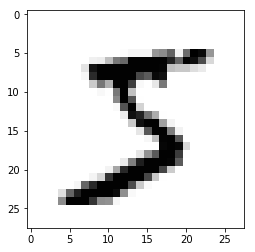

In [177]:
# 모든 이미지가 X_train에 저장되어 있으므로 [0]는 첫번째 이미지
# cmap = 'Greys' 옵션을 지정해 흑백을 출력되게 한다.

import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='Greys')
plt.show()

# <span style='color:deeppink'>4. 코드로 확인

In [178]:
# 일반적으로 python에서 문자열 출력 시 print문을 사용한다.
# 하지만 이 print문은 자동으로 개행이 되기 때문에 여러 줄의 문자열 출력시 불편하다.
# 때문에 sys 모듈을 사용하여 sys.stdout.write()함수를 사용한다. (개행제거 - 붙여서 출력해줌.)

sys.stdout.write('aaa')
sys.stdout.write('bbb')
print()
print('aaa')
print('bbb')
print('ccc')

aaabbb
aaa
bbb
ccc


In [179]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


# <span style='color:deeppink'>5. 차원 변환 과정

In [180]:
# reshape(총 샘플 수, 1차원속성의 수(28x28=784개의 속성))
# 0~9까지 10개 클래스 중 하나를 맞히는 문제가 된다.

X_train = X_train.reshape(X_train.shape[0], 784)

In [181]:
# keras는 데이터를 0에서 1사이의 값으로 변환한 다음 구동할 때 최적의 성능이다.
# 때문에 0~255 -> 0~1 사이의 값으로 바꿔야 한다. 즉, 각 값을 255로 나눈다. 
# 이렇게 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정을 
# 데이터 정규화(normalization)라고 한다.

X_train = X_train.astype('float64')
X_train = X_train / 255

In [198]:
# X_test에도 마찬가지로 이 작업을 적용한다. 

X_test = X_test.reshape(X_test.shape[0],784).astype('float64') / 255

# <span style='color:deeppink'>6. 클래스 값 확인

In [153]:
# 이제 숫자 이미지에 매겨진 이름을 확인해 보자. 
# 시각적으로 봤을때 5라는 것을 알 수 있다.
# 실제로 이 숫자의 레이블이 어떤지 확인해 보자.

print('class : %d' % (Y_class_train[0]))

class : 5


# <span style='color:deeppink'>7. 바이너리화 과정

In [154]:
# 여기서 딥러닝의 분류 문제를 해결하려면 원-핫 인코딩 방식을 적용해야 한다고 배웠다.
# 즉, 5가 [0,0,0,0,1,0,0,0,0,0]이 되어야 하는 것이다.
# to_categoricdal(클래스, 클래스의 개수)

Y_train = np_utils.to_categorical(Y_class_train,10)
Y_test  = np_utils.to_categorical(Y_class_test,10)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# <span style='color:deeppink'>8. 딥러닝 프레임 설정

In [155]:
from keras.models import Sequential
from keras.layers import Dense

In [156]:
# 784개의 속성(입력), 512개의 은닉층, 10개의 클래스(출력)
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [157]:
# 딥러닝 실행 환경을 위해 오차 함수로 categorical_crossentropy (3개 이상일 때)
# 최적화 함수로 adam 사용.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# <span style='color:deeppink'>9. 모델 저장, 자동 중단 설정

In [158]:
import os
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [159]:
# 모델 저장폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
Modelpath='./model/{epoch:02d}-[val_loss:.4f].hdf5'

In [160]:
# 모델 업데이트 및 저장
# filepath:모델이 저장될 곳 
checkpointer = ModelCheckpoint(filepath=Modelpath, monitor='val_loss',verbose=1,save_best_only=True)

In [161]:
# 자동 중단 설정 (patience=10 : 10회 이상 성과 향상이 없으면 자동으로 학습중단.)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

# <span style='color:deeppink'>10. 실행

In [162]:
# 샘플 200개를 모두 30번 실행하게 설정
# 테스트셋으로 최종 모델의 성과를 측정하여 값을 출력.
out = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=30, batch_size=200, verbose=0, 
                callbacks=[early_stopping_callback,checkpointer])

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15527, saving model to ./model/01-[val_loss:.4f].hdf5

Epoch 00002: val_loss improved from 0.15527 to 0.10494, saving model to ./model/02-[val_loss:.4f].hdf5

Epoch 00003: val_loss improved from 0.10494 to 0.08425, saving model to ./model/03-[val_loss:.4f].hdf5

Epoch 00004: val_loss improved from 0.08425 to 0.07956, saving model to ./model/04-[val_loss:.4f].hdf5

Epoch 00005: val_loss improved from 0.07956 to 0.06760, saving model to ./model/05-[val_loss:.4f].hdf5

Epoch 00006: val_loss improved from 0.06760 to 0.06492, saving model to ./model/06-[val_loss:.4f].hdf5

Epoch 00007: val_loss did not improve from 0.06492

Epoch 00008: val_loss improved from 0.06492 to 0.06311, saving model to ./model/08-[val_loss:.4f].hdf5

Epoch 00009: val_loss improved from 0.06311 to 0.05912, saving model to ./model/09-[val_loss:.4f].hdf5

Epoch 00010: val_loss did not improve from 0.05912

Epoch 00011: val_loss did not improve from 0.05912

Epoch 00012: va

# <span style='color:deeppink'>11. 그래프

In [163]:
# 학습셋의 오차
y_loss = out.history['loss']

# 테스트셋의 오차
y_vloss = out.history['val_loss']

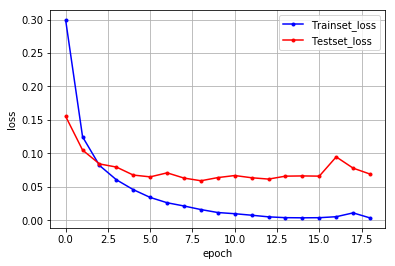

In [164]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()